<a href="https://colab.research.google.com/github/niteeshpandey9555-crypto/Agentic-AI-Task-Planner-with-Goal-Reflex-Learning-Agents/blob/main/Marketing_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files

uploaded = files.upload()

Saving bankmarketing.csv to bankmarketing.csv


Reading uploaded file: bankmarketing.csv
Shape of Dataset: (41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.

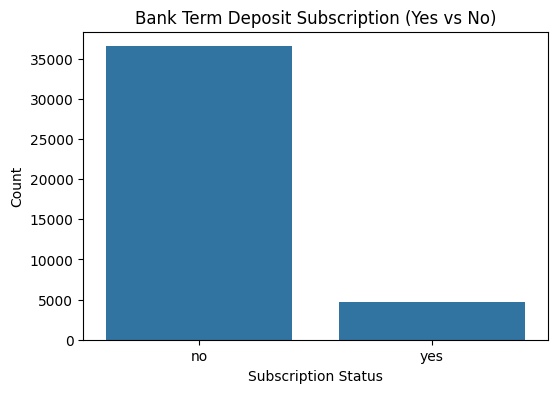

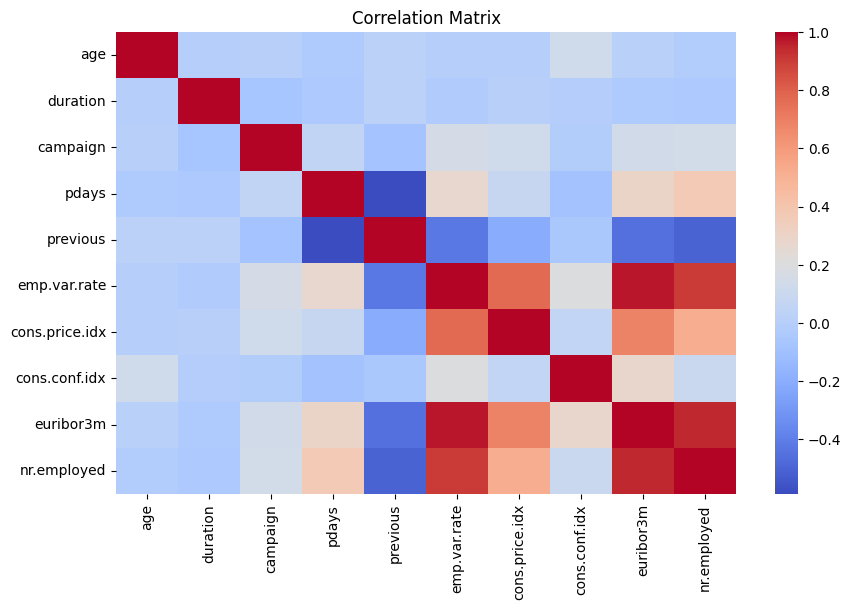

Accuracy Score: 0.9126001456664239

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7303
           1       0.69      0.41      0.52       935

    accuracy                           0.91      8238
   macro avg       0.81      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



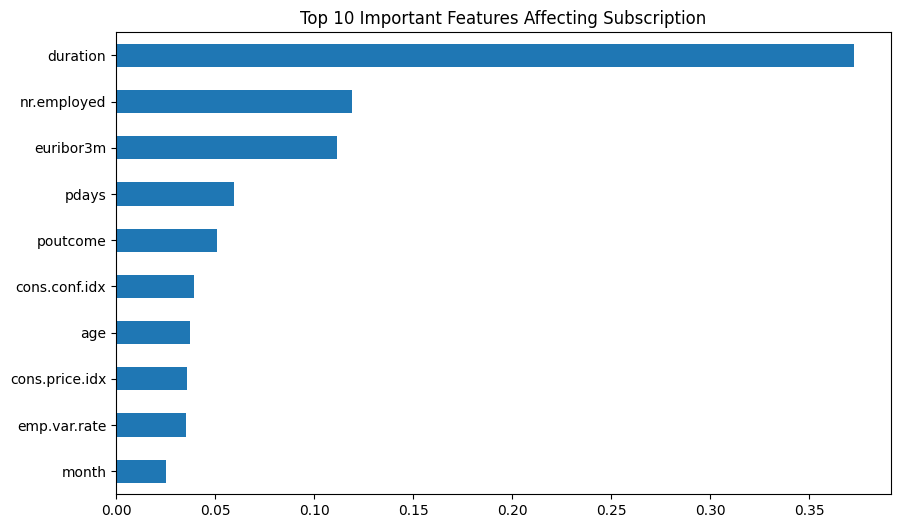

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# ================================
# 2. Load Dataset
# ================================
# Check if a file was uploaded via files.upload()
if uploaded:
    # Get the name of the first uploaded file
    filename = list(uploaded.keys())[0]
    print(f"Reading uploaded file: {filename}")
else:
    filename = 'bankmarketing.csv'
    print(f"Attempting to read default file: {filename}")

df = pd.read_csv(filename)

# Display first 5 rows
df.head()

# ================================
# 3. Data Health Check
# ================================

# Dataset shape
print("Shape of Dataset:", df.shape)

# Data types & missing values
df.info()
df.isnull().sum()

# ================================
# 4. Summary Statistics
# ================================
df.describe()

# ================================
# 5. Target Variable Analysis
# ================================
plt.figure(figsize=(6,4))
sns.countplot(x='y', data=df)
plt.title('Bank Term Deposit Subscription (Yes vs No)')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.show()

# ================================
# 6. Correlation Matrix
# ================================
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# ================================
# 7. Feature Engineering
# ================================

# Convert categorical columns into numerical
le = LabelEncoder()
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# ================================
# 8. Feature & Target Selection
# ================================
X = df.drop('y', axis=1)
y = df['y']

# ================================
# 9. Train-Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================================
# 10. Model Training
# ================================
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, y_train)

# ================================
# 11. Model Evaluation
# ================================
y_pred = rf_model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ================================
# 12. Feature Importance
# ================================
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
)

plt.figure(figsize=(10,6))
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features Affecting Subscription')
plt.gca().invert_yaxis()
plt.show()

# ================================
# 13. Conclusion
# ================================
# - Dataset imbalanced hai (majority customers subscribe nahi karte)
# - Balance, previous campaign outcome aur contact duration important factors hain
# - Bank ko high-potential customers par focus karna chahiye
# ================================